### Import Libraries

In [38]:
import pandas as pd
import os
import importlib
import json
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from actions import evaluate, helpers
importlib.reload(evaluate)
importlib.reload(helpers)
from actions.evaluate import ViolenceDetectionEvaluator
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

In [2]:
VIDEO_URLS_PATH = "../../data/metadata/video_links_labels.csv"
LABEL_COLUMN = "binary_label"

## Chatgpt judge

### API based results evaluation

In [3]:
api_based_df = helpers.append_results(
    [
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results1.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results2.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results3.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results4.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results5.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results6.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results7.csv",
        "../../data/results/zero_shot_classification/llm_judge_api_based/output/batch_results8.csv",
    ]
)
metadata_df = pd.read_csv(VIDEO_URLS_PATH)
api_based_df = api_based_df.merge(metadata_df[[LABEL_COLUMN, "id"]], right_on="id", left_on="video_name", how="inner")

In [4]:
# Initialize evaluator
evaluator = ViolenceDetectionEvaluator(api_based_df, ground_truth_col=LABEL_COLUMN)

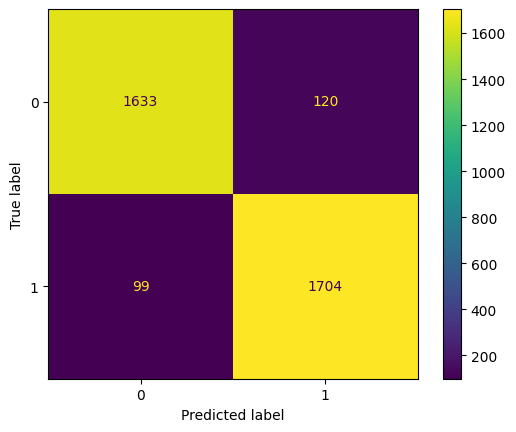

In [5]:
# evaluate results
metrics = evaluator.evaluate_with_threshold(threshold=0.5, confidence_filter=0.5)
# plot confusion matrix and classification report
evaluator.plot_confusion_matrix(metrics)
evaluator.plot_classification_report(metrics)

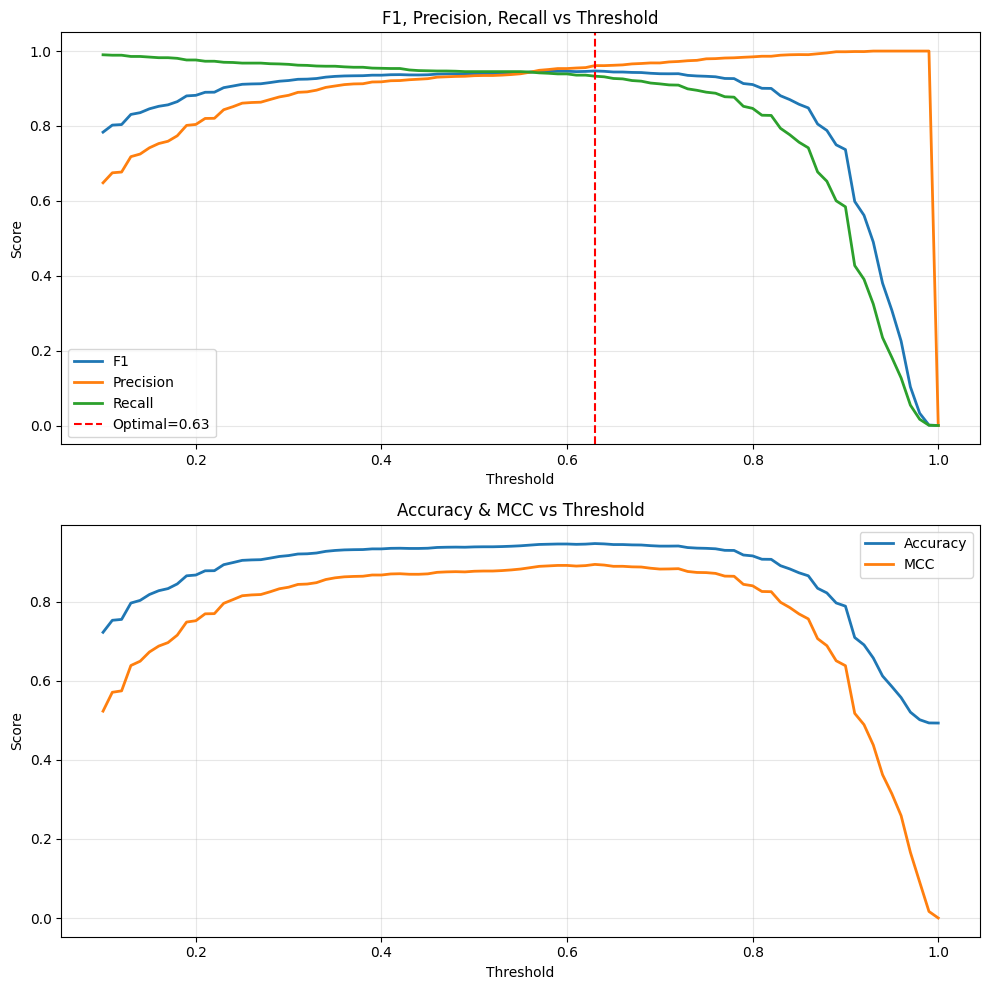

In [8]:
evaluator.plot_threshold_analysis()

In [86]:
evaluator.analyze_modality_combinations()

,total_videos,correct_predictions,incorrect_predictions
top_3_modalities,,,
transcripts|audio|vision,1591,1551,40
transcripts|vision|audio,1520,1433,87
vision|transcripts|audio,338,279,59
vision|audio|transcripts,82,41,41
audio|vision|transcripts,16,14,2
vision|audio,6,2,4
audio|transcripts|vision,2,2,0
audio|vision,1,1,0


### Open source results evaluation

In [9]:
open_source_df = helpers.append_results(
    [
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results1.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results2.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results3.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results4.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results5.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results6.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results7.csv",
        "../../data/results/zero_shot_classification/llm_judge_open_source/output/batch_results8.csv",
    ]
)
metadata_df = pd.read_csv(VIDEO_URLS_PATH)
open_source_df = open_source_df.merge(metadata_df[[LABEL_COLUMN, "id"]], right_on="id", left_on="video_name", how="inner")

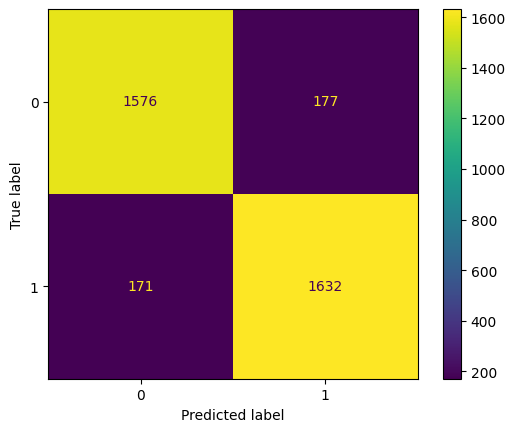

In [11]:
# Initialize evaluator
evaluator = ViolenceDetectionEvaluator(open_source_df, ground_truth_col=LABEL_COLUMN)
# evaluate results
metrics = evaluator.evaluate_with_threshold(threshold=0.5, confidence_filter=0.5)
# plot confusion matrix and classification report
evaluator.plot_confusion_matrix(metrics)
evaluator.plot_classification_report(metrics)

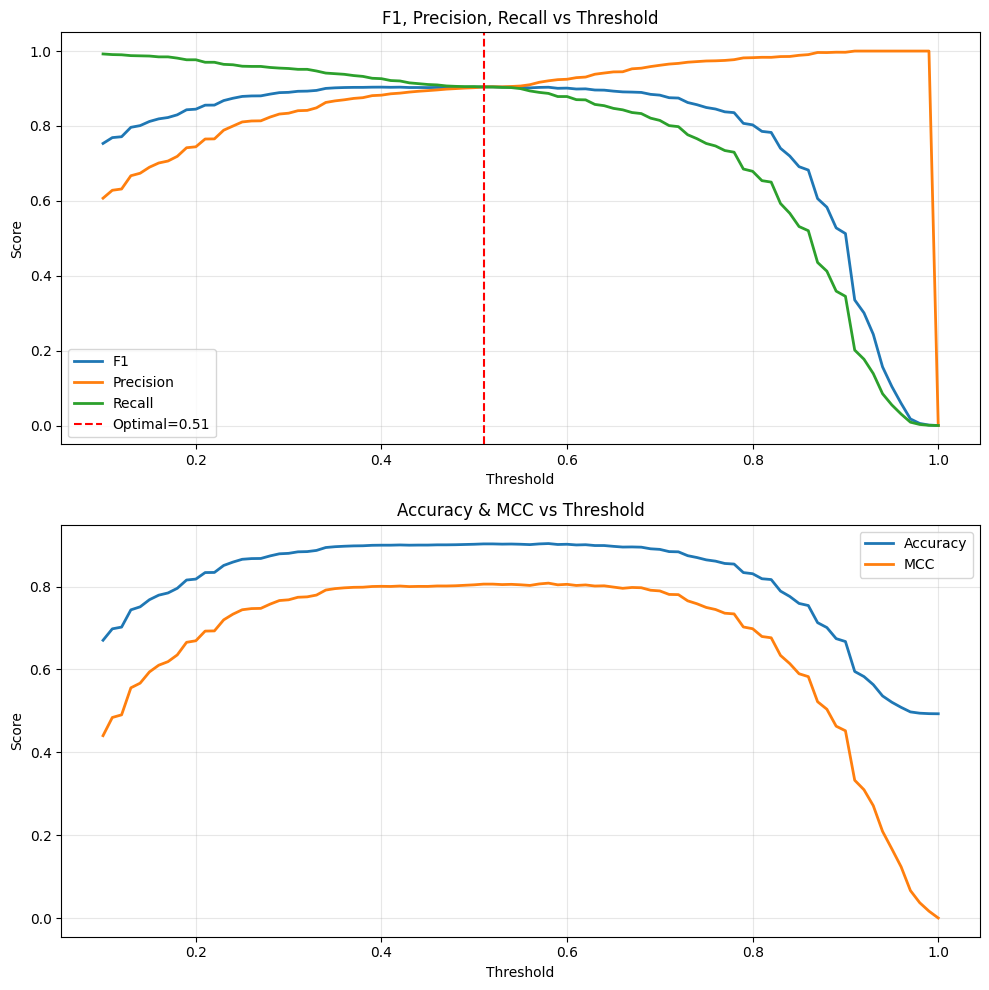

In [12]:
evaluator.plot_threshold_analysis()

In [13]:
evaluator.analyze_modality_combinations()

,total_videos,correct_predictions,incorrect_predictions
top_3_modalities,,,
transcripts|audio|vision,1224,1181,43
transcripts|vision|audio,928,860,68
vision|transcripts|audio,876,754,122
vision|audio|transcripts,388,290,98
audio|vision|transcripts,64,57,7
vision|audio,55,38,17
audio|transcripts|vision,20,18,2
transcripts|audio,1,1,0


## Open source judge

### Qwen3-30b-a3b-thinking-2507

Using same prompt as before

In [14]:
open_source_df = pd.read_csv("../../data/results/zero_shot_classification/llm_judge_qwen/results.csv")
metadata_df = pd.read_csv(VIDEO_URLS_PATH)
open_source_df = open_source_df.merge(metadata_df[[LABEL_COLUMN, "id"]], right_on="id", left_on="video_name", how="inner")

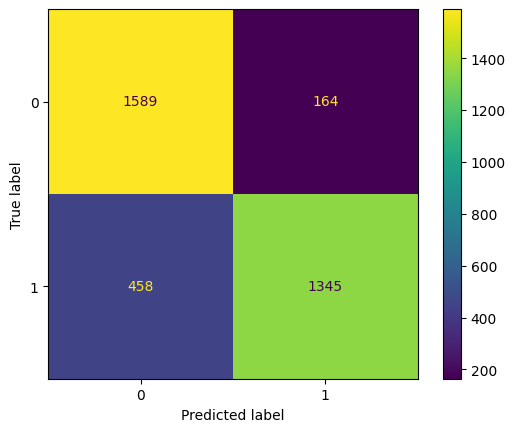

In [15]:
# Initialize evaluator
evaluator = ViolenceDetectionEvaluator(open_source_df, ground_truth_col=LABEL_COLUMN)
# evaluate results
metrics = evaluator.evaluate_with_threshold(threshold=0.5, confidence_filter=0.5)
# plot confusion matrix and classification report
evaluator.plot_confusion_matrix(metrics)
evaluator.plot_classification_report(metrics)

### Qwen3-30b-a3b-thinking-2507

Prompt engineering try 1: Focus on defining what violence is

In [16]:
open_source_df = pd.read_csv("../../data/results/zero_shot_classification/llm_judge_qwen/results_alt_prompt.csv")
metadata_df = pd.read_csv(VIDEO_URLS_PATH)
open_source_df = open_source_df.merge(metadata_df[[LABEL_COLUMN, "id"]], right_on="id", left_on="video_name", how="inner")

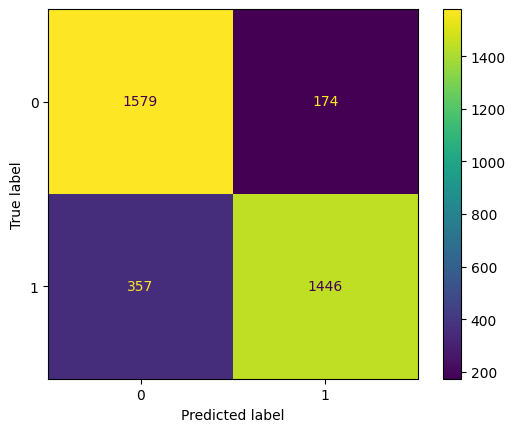

In [17]:
# Initialize evaluator
evaluator = ViolenceDetectionEvaluator(open_source_df, ground_truth_col=LABEL_COLUMN)
# evaluate results
metrics = evaluator.evaluate_with_threshold(threshold=0.5, confidence_filter=0.5)
# plot confusion matrix and classification report
evaluator.plot_confusion_matrix(metrics)
evaluator.plot_classification_report(metrics)